# Bank Marketing Data Analysis
This notebook presents an analysis of the `bankmarketing.csv` dataset, which includes data related to a bank's marketing campaigns. The main goal is to understand customer behavior and predict whether a client will subscribe to a term deposit.

In [19]:

import pandas as pd

# Load the dataset
df = pd.read_csv('data/bankmarketing.csv',na_values=["unknown"])

# Display the first few rows
df.head()


age        job  marital    education default housing loan    contact month  \
0   56  housemaid  married     basic.4y      no      no   no  telephone   may   
1   57   services  married  high.school     NaN      no   no  telephone   may   
2   37   services  married  high.school      no     yes   no  telephone   may   
3   40     admin.  married     basic.6y      no      no   no  telephone   may   
4   56   services  married  high.school      no      no  yes  telephone   may   

  day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0         mon  ...         1    999         0  nonexistent          1.1   
1         mon  ...         1    999         0  nonexistent          1.1   
2         mon  ...         1    999         0  nonexistent          1.1   
3         mon  ...         1    999         0  nonexistent          1.1   
4         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [45]:
# Check for missing values and data types
missing_values_df = df.isnull()
#print("DataFrame indicating missing values:")
#print(missing_values_df.head(5))
print("Count of missing values:")
missing_counts = missing_values_df.sum()
print(missing_counts)
# data types
print("Data types:")
print(df.dtypes)



Count of missing values:
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
Data types:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64

In [30]:

# Summary statistics
print(df.describe(include="all"))


                age     job  marital          education default housing  \
count   41188.00000   40858    41108              39457   32591   40198   
unique          NaN      11        3                  7       2       2   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  \
count   40198     41

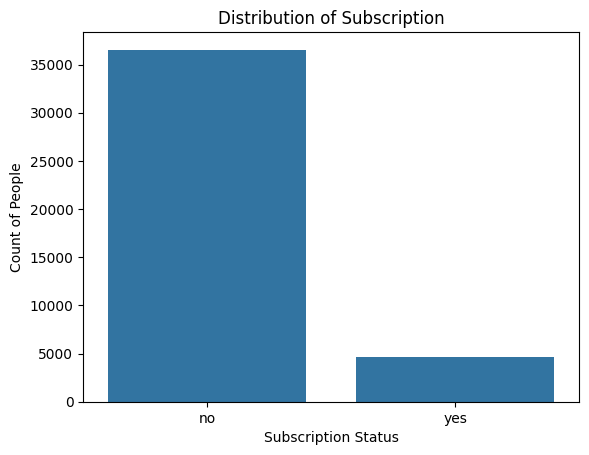

In [39]:

import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='y', data=df)
plt.title("Distribution of Subscription")
plt.xlabel("Subscription Status")
plt.ylabel("Count of People")
plt.show()

Correlation Matrix:
               age  duration  campaign     pdays  previous  emp.var.rate  \
age       1.000000 -0.000866  0.004594 -0.034369  0.024365     -0.000371   
duration -0.000866  1.000000 -0.071699 -0.047577  0.020640     -0.027968   
campaign  0.004594 -0.071699  1.000000  0.052584 -0.079141      0.150754   
pdays    -0.034369 -0.047577  0.052584  1.000000 -0.587514      0.271004   
previous  0.024365  0.020640 -0.079141 -0.587514  1.000000     -0.420489   

          cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
age             0.000857       0.129372   0.010767    -0.017725  
duration        0.005312      -0.008173  -0.032897    -0.044703  
campaign        0.127836      -0.013733   0.135133     0.144095  
pdays           0.078889      -0.091342   0.296899     0.372605  
previous       -0.203130      -0.050936  -0.454494    -0.501333  


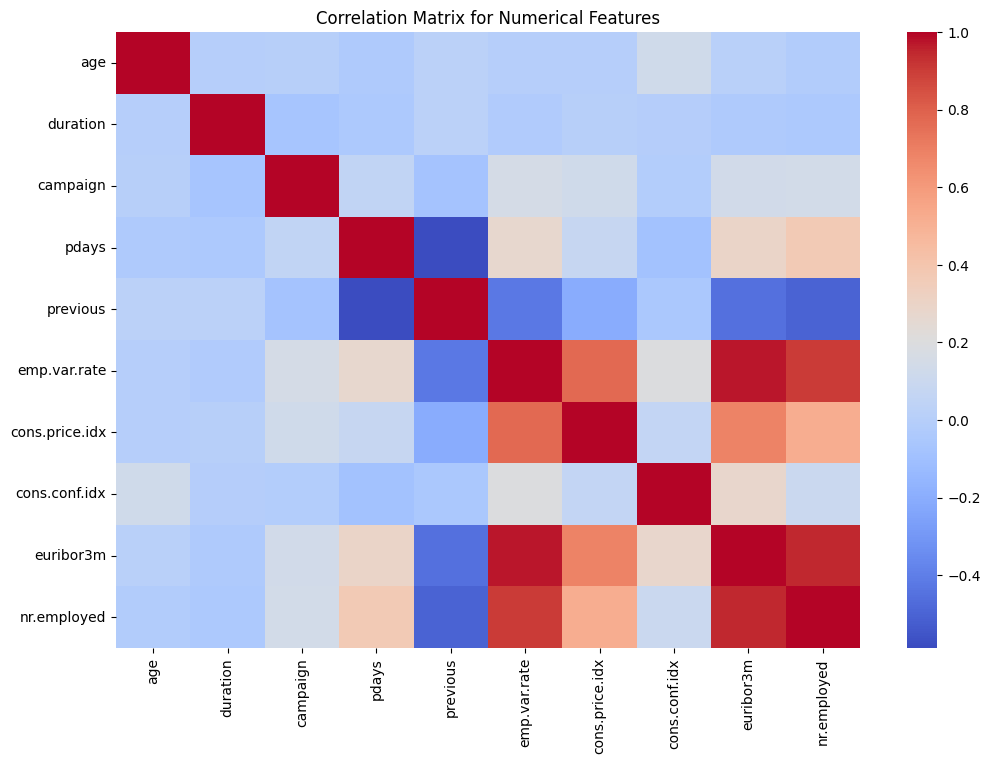

In [43]:

# Correlation matrix for numerical features

numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()

print("Correlation Matrix:")
print(corr_matrix.head())

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix for Numerical Features")
plt.show()



## Conclusion

In this analysis, we explored the structure and composition of the bank marketing dataset. Key takeaways include:

- The dataset includes customer demographics and contact details, which can be useful for segmentation.
- A majority of customers do not subscribe to term deposits, indicating an imbalanced dataset.
- Further preprocessing, feature engineering, and modeling would be the next steps for predictive analysis.

This initial inspection sets the foundation for a deeper analysis or machine learning workflow to improve marketing effectiveness.
